In [129]:
import pandas as pd
import os
import numpy as np
import pickle
import json
import scipy
import matplotlib.pyplot as plt
import shutil
from skimage.measure import regionprops
import cv2 
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
import sys
import string
from PIL import Image
from scipy import signal
from scipy.interpolate import interp1d
from skimage import measure
import seaborn as sns
from scipy import stats
from skimage.draw import rectangle
import importlib
import splitfolders
from scipy.stats import gaussian_kde
from skimage import data, color, io, img_as_float


import plots
import df_utils
importlib.reload(df_utils)
import features
import Figure2plots
importlib.reload(Figure2plots)
importlib.reload(Figure1plots)
import Figure1plots

In [2]:
df = pd.read_pickle('D://Datasets//full_data101x56_2_xc_fixed_calcs')
df = df_utils.filter_df(df,ymax=5,max_ar=1.1,radius_std=5)
df = df[(df.cell=='hl60')|(df.cell=='hl60d')]
df = df[np.logical_not((df.cell=='hl60')&(df.date=='11-3-20')&(df.run=='0'))]
df = df[np.logical_not((df.cell=='hl60')&(df.date=='11-5-20')&(df.run=='3'))]
print(len(df))

Length prefilter: 2337
Length postfilter: 1992
1564


In [9]:
row = df[df.cell=='hl60d'].iloc[193]
file_path = 'D:/' + row.date + '/' + row.cell + '/25_50_25x150/oi/' + row.run + '/bin/test_camera_0.raw'
tf = row.tf

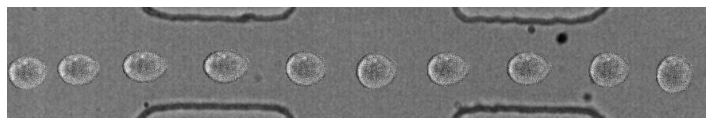

In [131]:
Figure1plots.cell_sequence(df,output_file='./figures/figure1/cell_sequence.pdf',save=True)

In [23]:
row['mask']

[array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

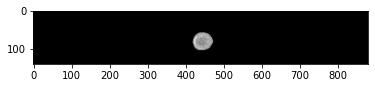

In [29]:
plt.imshow(df_utils.raw_frame(file_path,tf[20])*row['mask'][20],cmap='gray')

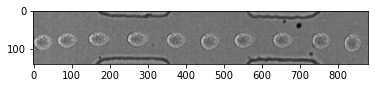

In [118]:
background = df_utils.raw_frame(file_path,100)
img1 = np.zeros(background.shape)
temp = np.zeros((len(row.tf),140,880))
temp_mask = np.zeros((len(row.tf),140,880))
tf_list = [2,7,11,14,17,21,25,28,31,35]
for i in tf_list:
    
    temp[i,:,:] = df_utils.raw_frame(file_path,row.tf[i])*row['mask'][i] - background*row['mask'][i]
    temp_mask[i,:,:] = row['mask'][i]
    
img_mask = np.sum(temp_mask,axis=0).astype(np.int)*0.5
img = np.sum(temp,axis=0)+cv2.blur(background,(3,3))
plt.imshow(img,cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


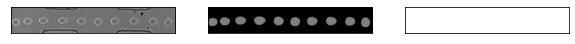

In [119]:
alpha=0.5
# Construct RGB version of grey-level image
color_mask = np.dstack((img_mask, img_mask, img_mask))
img_color = np.dstack((img, img, img))

# Convert the input image and color mask to Hue Saturation Value (HSV)
# colorspace
img_hsv = color.rgb2hsv(img_color)
color_mask_hsv = color.rgb2hsv(color_mask)

# Replace the hue and saturation of the original image
# with that of the color mask
img_hsv[..., 0] = color_mask_hsv[..., 0]
img_hsv[..., 1] = color_mask_hsv[..., 1] * alpha

img_masked = color.hsv2rgb(img_hsv)

# Display the output
f, (ax0, ax1, ax2) = plt.subplots(1, 3,
                                  subplot_kw={'xticks': [], 'yticks': []},figsize=(10,10))
ax0.imshow(img, cmap=plt.cm.gray)
ax1.imshow(color_mask)
ax2.imshow(img_masked)
plt.show()

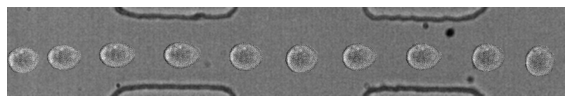

In [120]:
plt.figure(figsize=(10,10))
plt.imshow(img_mask,cmap='jet',alpha=0.5)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

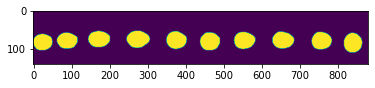

In [116]:
plt.imshow(img_mask)

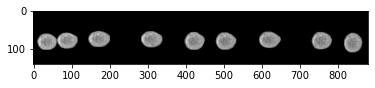

In [51]:
plt.imshow(np.sum(temp,axis=0),cmap='gray')

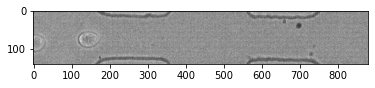

In [13]:
plt.imshow(np.add(background,np.add(img1-background,img2-background)),cmap='gray')